In [1]:
import sys
sys.path.append('../../TINYpub/TINY/')
import TINY 
import UTILS
from mes_imports import *
import load_data_Loader
import SOLVE_EB as EB

In [2]:
list_df_performance = [pd.read_csv('results/TINY_' + str(i) + '/df_performance.csv') for i in range(1, 4)]
list_df_tracker = [pd.read_csv('results/TINY_' + str(i) + '/df_tracker.csv') for i in range(1, 4)]

In [3]:
ft = 15
lw = 0.6
lw_b = 1.2

In [4]:
colors = {1 : {'name' : 'red', 'RGBa' : (1, 0, 0, 0.4)},
          2 : {'name' : 'blue', 'RGBa' : (0, 0, 1, 0.4)},
          3 : {'name' : 'green', 'RGBa' : (0, 1, 0, 0.4)},
          4 : {'name' : 'purple', 'RGBa' : (1, 0, 1, 0.4)},
          5 : {'name' : 'black', 'RGBa' : (0, 0, 0, 0.4)}}

In [5]:
depth = 3

In [6]:
def moyenne_glissante(x, coef = 2) :
    conv1d = torch.ones(1, 1, coef)/ coef
    #print(torch.from_numpy(x[None, None, :]).type(), conv1d.type())
    x_lisse = torch.nn.functional.conv1d(torch.from_numpy(x[None, None, :]).type(torch.FloatTensor), conv1d)
    return(x_lisse[0, 0, :].numpy())

In [7]:
def plot_accuracy_nbr_params(axs, i) :
    #fig,
    ax = axs[i]
    #ax.set_xscale('symlog')
    #plt.subplots(1, 1)
    coef = 1
    A_tr = np.concatenate([df_performance['A_tr'].values[None, :] for df_performance in list_df_performance])
    A_te = np.concatenate([df_performance['A_te'].values[None, :] for df_performance in list_df_performance])
    T = np.concatenate([df_performance['T'].values[None, :] for df_performance in list_df_performance])
    
    leg1 = ax.plot(T.mean(axis = 0), A_tr.mean(axis = 0), label = 'Acc. training', color = colors[1]['name'], linewidth=lw)
    leg2 = ax.plot(T.mean(axis = 0), A_te.mean(axis = 0), label = 'Acc. test', color = colors[2]['name'], linewidth=lw)
    
    ax.fill_between(T.mean(axis = 0), A_tr.mean(axis = 0) - A_tr.std(axis = 0),
                    A_tr.mean(axis = 0) + A_tr.std(axis = 0), color = colors[1]['RGBa'])
    ax.fill_between(T.mean(axis = 0), A_te.mean(axis = 0) - A_te.std(axis = 0), 
                    A_te.mean(axis = 0) + A_te.std(axis = 0), color = colors[2]['RGBa'])
    #ax.legend()
    ax_nbrp = ax.twinx()
    #leg3 = ax_nbrp.plot(df_tracker['T'] , df_tracker['nbr_parameters_apres'], '-', linewidth = 0.6,  label = 'nbr_parameters', color = 'black')
    #leg4 = ax_nbrp.plot(df_tracker['T'] , df_tracker['size_layer_1'] * (28*28 + 1), '-', linewidth = 0.6,  label = 'nbr_parameters', color = 'red')
    #leg5 = ax_nbrp.plot(df_tracker['T'] , (df_tracker['size_layer_2'] + 1) * 10, '-', linewidth = 0.6,  label = 'nbr_parameters', color = 'orange')
    
    
    T = np.concatenate([df_tracker['T'].values[None, :] for df_tracker in list_df_tracker])
    S_1 = np.concatenate([df_tracker['size_layer_1'].values[None, :] for df_tracker in list_df_tracker])
    S_2 = np.concatenate([df_tracker['size_layer_2'].values[None, :] for df_tracker in list_df_tracker])
    
    leg4 = ax_nbrp.plot(T.mean(axis = 0) , S_1.mean(axis = 0) , '-', linewidth = 0.6,  label = r'$n_1$', color = colors[4]['name'])
    leg5 = ax_nbrp.plot(T.mean(axis = 0) , S_2.mean(axis = 0), '-', linewidth = 0.6,  label = r'$n_2$', color = colors[5]['name'])
    
    #ax_nbrp.fill_between(T.mean(axis = 0) , S_1.mean(axis = 0)  + S_1.std(axis = 0) , 
    #                     S_1.mean(axis = 0)  - S_1.std(axis = 0), color = colors[4]['RGBa'])
    #ax_nbrp.fill_between(T.mean(axis = 0) , S_2.mean(axis = 0)  + S_2.std(axis = 0) , 
    #                     S_2.mean(axis = 0)  - S_2.std(axis = 0), color = colors[5]['RGBa'])
    
    #ax_nbrp.legend(loc = 'lower right')
    #ax.set_title('Acc / nbr of neurons', fontsize = ft)
    ax.set_ylabel(r'$acc$', fontsize = ft, rotation = 0)
    #ax.set_xlabel('Time (second)', fontsize = ft)

    ax_nbrp.set_ylabel(r'$n_l$', fontsize = ft, rotation = 0)

    ax_nbrp.tick_params(axis='both', which='major', labelsize=12)
    ax_nbrp.tick_params(axis='both', which='minor', labelsize=10)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.tick_params(axis='both', which='minor', labelsize=10)
    
    plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))


    #legs = leg1 + leg2 + leg3 + leg4 + leg5
    legs = leg1 + leg2 + leg4 + leg5
    labs = [l.get_label() for l in legs]
    #ax_nbrp.set_yscale('log')
    
    ax.legend(legs, labs, loc=0, ncol = 2)
    return(ax_nbrp)
#plt.show()

In [9]:
def plot_sum_vps_sq(axs, i) :
    ax = axs[i]
    #ax.set_xscale('symlog')
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.tick_params(axis='both', which='minor', labelsize=10)
    
    ax_vps = ax.twinx()
    ax_vps.tick_params(axis='both', which='major', labelsize=12)
    ax_vps.tick_params(axis='both', which='minor', labelsize=10)
    
    for d in range(1, depth) :
        sum_lsq_d1 = np.concatenate([df_tracker[df_tracker['depth_add'] == d]['sum_vps_sq'].values[None, :] for df_tracker in list_df_tracker])

        x_d1 = np.concatenate([df_tracker[df_tracker['depth_add'] == d]['T'].values[None, :] for df_tracker in list_df_tracker])
        DV_proj_norm_2 =  np.concatenate([df_tracker[df_tracker['depth_add'] == d]['DV_proj_norm_sq'].values[None, :] / 50000 for df_tracker in list_df_tracker])


        #sum_lsq_d2 = np.concatenate([df_tracker[df_tracker['depth_add'] == 2]['sum_vps_sq'].values[None, :] for df_tracker in list_df_tracker])
        #x_d2 = np.concatenate([df_tracker[df_tracker['depth_add'] == 2]['T'].values[None, :] for df_tracker in list_df_tracker])
        #DV_proj_norm_3 =  np.concatenate([df_tracker[df_tracker['depth_add'] == 2]['DV_proj_norm_sq'].values[None, :] / 50000 for df_tracker in list_df_tracker])
        #print(d, sum_lsq_d1, DV_proj_norm_2)
        vps1OverDV2 = sum_lsq_d1 / DV_proj_norm_2
        #vps2OverDV3 = sum_lsq_d2 / DV_proj_norm_3
        
        ax_vps.plot(moyenne_glissante(x_d1.mean(axis = 0)), moyenne_glissante(sum_lsq_d1.mean(axis = 0)), '--', color = colors[2 + d + 1]['RGBa'], linewidth = lw_b)
        
        ax.plot(moyenne_glissante(x_d1.mean(axis = 0)), moyenne_glissante(vps1OverDV2.mean(axis = 0)), '-', label = int(d), color = colors[2 + d + 1]['RGBa'], linewidth = lw)
        #ax.plot(moyenne_glissante(x_d2.mean(axis = 0)), moyenne_glissante(vps2OverDV3.mean(axis = 0)), '-', label = '2', color = colors[3]['name'], linewidth = lw)

        #axs_vps.fill_between(moyenne_glissante(x_d1.mean(axis = 0)), moyenne_glissante(sum_lsq_d1.mean(axis = 0) - sum_lsq_d1.std(axis = 0)),
        #                moyenne_glissante(sum_lsq_d1.mean(axis = 0) + sum_lsq_d1.std(axis = 0)), color = colors[2 + d + 1]['RGBa'])
        
        ax.fill_between(moyenne_glissante(x_d1.mean(axis = 0)), moyenne_glissante(vps1OverDV2.mean(axis = 0) - vps1OverDV2.std(axis = 0)),
                        moyenne_glissante(vps1OverDV2.mean(axis = 0) + vps1OverDV2.std(axis = 0)), color = colors[2 + d + 1]['RGBa'])
        #ax.fill_between(moyenne_glissante(x_d2.mean(axis = 0)), moyenne_glissante(vps2OverDV3.mean(axis = 0) - vps2OverDV3.std(axis = 0)),
        #                 moyenne_glissante(vps2OverDV3.mean(axis = 0) + vps2OverDV3.std(axis = 0)), color = colors[3]['RGBa'])

    ax.set_yscale('log')
    ax.set_ylabel(r'$\frac{\sum_k\lambda_k^2}{\hat{\mathbb{E}}\left[||{V_{goal}}_{proj}||^2\right]}$', fontsize = ft, rotation = 0)
    #ax_vps.set_ylabel(r'$\sum_k \lambda_k^2$', fontsize = ft, rotation = 0)
    ax.legend()
    return(ax_vps)
    #plt.legend()

In [10]:
def plot_norm_DV(axs, i) :
    ax = axs[i]
    #ax.set_xscale('exp')
    
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.tick_params(axis='both', which='minor', labelsize=10)
    list_DV = []
    for df_tracker in list_df_tracker :
        df_tracker['size_layer_3'] = 10
        list_DV_d = []
        for d in range(1, depth + 1) :
            #DV_d = df_tracker[df_tracker['depth_NG'] == d][['DV_norm_' + str(d), 
            #                                                'size_layer_' + str(d), 
            #                                                'T']].rename(columns = {'DV_norm_' + str(d) : 'DV_norm'})
            DV_d = df_tracker[['DV_norm_' + str(d), 
                                                            'size_layer_' + str(d), 
                                                            'T']].rename(columns = {'DV_norm_' + str(d) : 'DV_norm'})
            DV_d.insert(1, 'depth', np.ones(len(DV_d)) * d)
            list_DV_d.append(DV_d)
        DV = pd.concat(list_DV_d).sort_index()
        list_DV.append(DV)

    
    for d in set(list_DV[0]['depth'].values):
        #ax.plot(DV[DV['depth'] == d]['DV_norm'].values, 'o', label = d)
        y = np.concatenate([DV[DV['depth'] == d]['DV_norm'].values[None, :] for DV in list_DV])
        #if d == 1 :
        #    size_1 = 28*28 * np.ones(y.shape)
        #else :
        #    size_1 = np.concatenate([DV[DV['depth'] == d]['size_layer_'+str(int(d-1))].values[None, :] for DV in list_DV])
        #if d == 4 :
        #    size_2 = 10 * np.ones(y.shape)
        #else :
        
        if d < 3 :
            size_2 = np.concatenate([DV[DV['depth'] == d]['size_layer_' + str(int(d))].values[None, :] for DV in list_DV])
        else :
            size_2 = np.ones(y.shape)*10
        
        #print('size_2:', d, size_2)
        x = np.concatenate([DV[DV['depth'] == d]['T'].values[None, :] for DV in list_DV])
        #ax.plot(x, y/(size_1*size_2), 'o', label = d)
        #ax.plot(x[2:], y[2:], 'o', label = d)
        #print(x.shape, y.shape, size_2.shape)
        yoverS = y / size_2
        #yoverS = y
        ax.plot(x.mean(axis = 0), yoverS.mean(axis = 0) , '-', label = int(d), color = colors[d + 2]['RGBa'], linewidth = lw)
        ax.fill_between(x.mean(axis = 0), yoverS.mean(axis = 0) - yoverS.std(axis = 0),
                        yoverS.mean(axis = 0) + yoverS.std(axis = 0), color = colors[d + 2]['RGBa'])
        
        
    
        
    #plt.plot(DV_d2, 'o', label = '2')
    #plt.plot(DV_d3, 'o', label = '3')
    #plt.plot(x_d1, DV_d1, 'o', label = '1')
    #plt.plot(x_d2, DV_d2, 'o', label = '2')
    #plt.plot(x_d3, DV_d3, 'o', label = '3')
    ax.set_yscale('log')
    #ax.set_xscale('log')
    ax.set_ylabel(r'$\hat{\mathbb{E}}\left[\frac{||v_{goal}||}{shape(v_{goal})}\right]$', fontsize = ft, rotation = 0, loc = 'center')
    ax.set_xlabel('Time (second)', fontsize = ft)
    
    ax.legend(loc = 'upper right')

In [11]:
diff = 0.012
A_tr = np.concatenate([df_performance['A_tr'].values[None, :] for df_performance in list_df_performance])
A_te = np.concatenate([df_performance['A_te'].values[None, :] for df_performance in list_df_performance])
is_overfit = (np.abs(A_tr.mean(axis = 0) -  A_te.mean(axis = 0)) >= diff)
x_overfit = (np.abs(A_tr.mean(axis = 0) -  A_te.mean(axis = 0)) < diff).sum()
T = np.concatenate([df_performance['T'].values[None, :] for df_performance in list_df_performance]).mean(axis = 0)
T_overfit = T[x_overfit]

In [12]:
A_tr.shape, x_overfit

((3, 80), 31)

In [13]:
A_tr.mean(axis = 0)[T == T_overfit], A_te.mean(axis = 0)[T == T_overfit]

(array([0.91683332]), array([0.90466666]))

In [14]:
#A_tr.mean(axis = 0)[int(T_overfit)], A_te.mean(axis = 0)[int(T_overfit)]

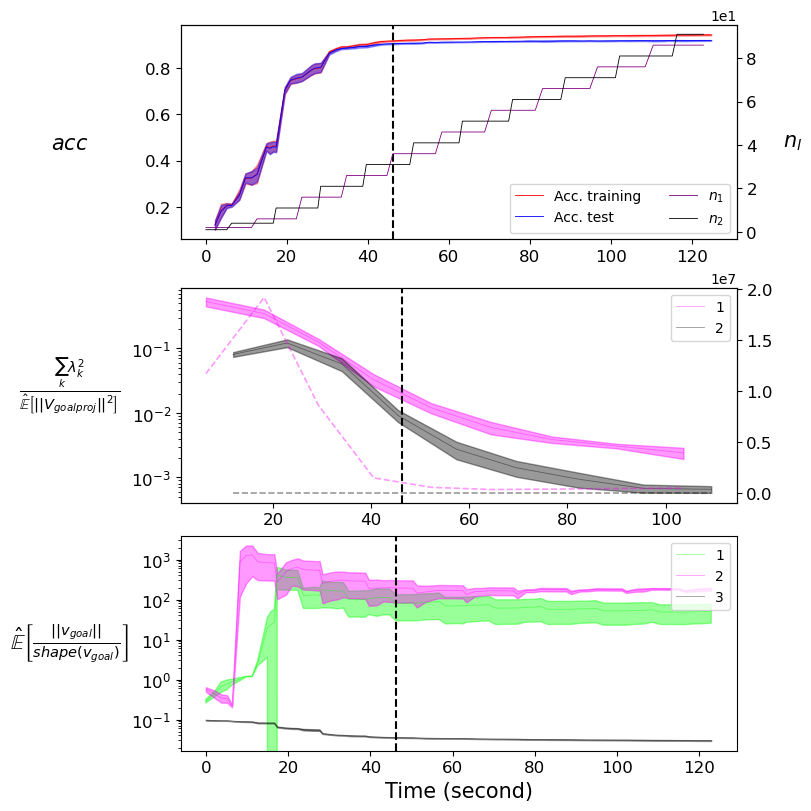

In [15]:
fig, axs = plt.subplots(3, 1, figsize = (8, 8), constrained_layout=True)
ax_nbrp = plot_accuracy_nbr_params(axs, 0)
ax_vps = plot_sum_vps_sq(axs, 1)
plot_norm_DV(axs, 2)
#axs[0].set_xlim(0, 50)
#axs[1].set_xlim(0, 50)
#axs[2].set_xlim(0, 50)
ax_nbrp.yaxis.set_label_coords(1.1,0.5)
axs[0].yaxis.set_label_coords(-0.2,0.4)
axs[1].yaxis.set_label_coords(-0.2,0.4)
axs[2].yaxis.set_label_coords(-0.2,0.4)
ax_vps.yaxis.set_label_coords(1.2,0.6)
axs[0].axvline(x = T_overfit, color = 'black', label = 'axvline - full height', ls= '--')
axs[1].axvline(x = T_overfit, color = 'black', label = 'axvline - full height', ls= '--')
axs[2].axvline(x = T_overfit, color = 'black', label = 'axvline - full height', ls= '--')
plt.savefig('Acc_sumvpssq_normDV_MNIST.pdf')
plt.show()

In [15]:
A_te.mean(axis
          = 0)

array([0.12283334, 0.18093334, 0.206     , 0.20803334, 0.24989999,
       0.32656666, 0.32616667, 0.34083334, 0.45830001, 0.45376666,
       0.46023333, 0.45886666, 0.70409999, 0.74773331, 0.75590003,
       0.76099998, 0.79126668, 0.79930001, 0.8009    , 0.80293336,
       0.86373333, 0.87630002, 0.88383333, 0.88590002, 0.88956668,
       0.89236669, 0.89243333, 0.8932    , 0.89886669, 0.90199999,
       0.90386667, 0.90466666, 0.90603336, 0.90640001, 0.9066333 ,
       0.9066    , 0.9073    , 0.9109    , 0.91036667, 0.91113333,
       0.91143334, 0.91156669, 0.91179999, 0.91173333, 0.91216667,
       0.9131    , 0.91369998, 0.91383332, 0.91459999, 0.91456666,
       0.91483335, 0.91489998, 0.91523333, 0.91590001, 0.91583333,
       0.91556668, 0.91596669, 0.9164    , 0.91676666, 0.91686668,
       0.91693332, 0.91640002, 0.91703333, 0.9164    , 0.9169    ,
       0.91696666, 0.91706665, 0.91736666, 0.91733334, 0.91773333,
       0.91773335, 0.91726669, 0.9176    , 0.91816666, 0.91803